K means clustering

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('StudentsPerformance.xls')
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
Y = df.iloc[:, [5,6,7]].values
Y

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

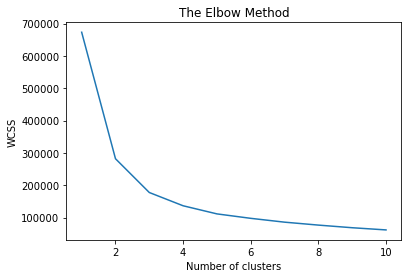

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(Y)

In [7]:
print(y_kmeans)

[0 1 1 2 1 1 1 2 0 2 2 2 0 0 2 0 1 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2 1 1 1
 2 1 2 2 0 0 0 2 0 0 0 0 1 2 0 2 1 1 2 1 2 0 2 0 2 0 0 0 0 2 0 0 2 0 0 2 2
 2 2 2 1 0 0 2 2 2 0 2 1 1 0 0 1 0 2 0 2 1 1 0 0 0 0 0 0 1 2 1 0 1 0 0 0 1
 2 2 2 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 2 1 2 1 1 1 2 2 0 0 0 0 0 2 2 1 2 1 0
 0 1 0 0 0 2 0 1 0 0 1 0 1 1 2 2 1 1 2 0 1 0 0 1 1 0 2 1 2 0 0 1 0 0 2 0 2
 0 0 0 2 1 0 1 0 0 1 2 0 2 2 1 1 0 0 0 2 0 0 1 1 0 1 2 2 2 1 1 1 2 0 2 0 1
 0 1 0 2 0 2 0 1 0 2 1 1 1 1 0 0 2 1 0 1 2 2 0 1 1 0 0 0 2 1 0 1 2 0 0 1 0
 1 0 1 2 1 0 2 0 0 1 0 0 2 2 0 1 1 1 0 1 0 2 2 1 0 2 1 1 1 1 1 0 1 0 0 1 0
 2 0 2 1 1 2 1 0 1 0 1 2 0 2 1 0 0 0 0 0 1 1 0 0 1 1 1 2 2 1 0 2 1 2 0 2 2
 1 1 0 0 2 2 2 2 0 0 0 0 1 0 1 0 1 0 2 0 2 0 0 0 0 0 1 0 1 2 2 0 2 0 0 2 1
 1 0 0 1 0 2 1 1 1 0 1 1 1 2 2 0 0 0 0 0 0 0 0 2 0 2 0 1 0 2 0 2 2 1 0 0 0
 1 2 1 0 1 0 0 0 0 0 0 0 2 1 0 2 0 2 0 1 0 0 0 0 0 2 2 0 2 0 0 0 1 1 1 0 1
 1 0 0 1 2 0 1 1 0 2 0 2 1 2 1 0 2 2 0 1 0 1 2 0 1 1 1 0 1 0 1 1 0 0 0 0 0
 2 0 2 2 0 2 0 2 1 0 0 1 

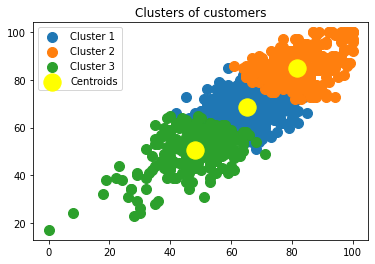

In [8]:
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100,  label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100,  label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_kmeans,kmeans.labels_))
print(classification_report(y_kmeans,kmeans.labels_))

[[445   0   0]
 [  0 306   0]
 [  0   0 249]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       445
           1       1.00      1.00      1.00       306
           2       1.00      1.00      1.00       249

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Hierarchical clustering

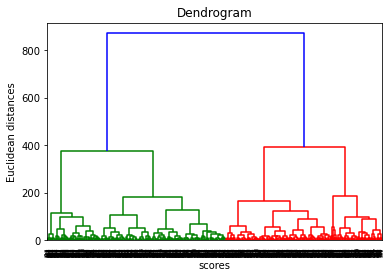

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('scores')
plt.ylabel('Euclidean distances')
plt.show()

In [1]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Y)
Y

NameError: name 'Y' is not defined

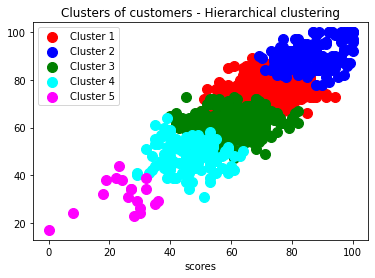

In [30]:
plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y[y_hc == 4, 0], Y[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers - Hierarchical clustering')
plt.xlabel('scores')
plt.legend()
plt.show()

DBSCAN

In [13]:
Y

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, metric='manhattan', min_samples=6)

In [18]:
dbscan.fit(Y)

DBSCAN(eps=1, metric='manhattan', min_samples=6)

In [19]:
dbscan.leaf_size

30

In [20]:
dbscan.components_

array([], shape=(0, 3), dtype=float64)

In [21]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_d

array([[-8.48837536e+00],
       [-2.54614413e+01],
       [-4.31217532e+01],
       [ 3.20362842e+01],
       [-1.47777920e+01],
       [-1.66193086e+01],
       [-4.14014957e+01],
       [ 4.69853000e+01],
       [ 4.76934729e+00],
       [ 3.18084398e+01],
       [ 2.28093999e+01],
       [ 3.94396714e+01],
       [-9.12066369e+00],
       [-9.48443273e+00],
       [ 2.43148137e+01],
       [-1.09021958e+01],
       [-3.43878789e+01],
       [ 7.22218779e+01],
       [ 4.00186670e+01],
       [ 1.74094552e+01],
       [ 3.15400225e+00],
       [-3.89192480e+00],
       [ 3.00915281e+01],
       [-6.77944554e+00],
       [-1.26094527e+01],
       [-9.00905947e+00],
       [ 1.48353818e+01],
       [-4.54815869e+00],
       [-8.60489633e-01],
       [-2.30888997e+00],
       [-7.94838168e+00],
       [ 8.32777550e+00],
       [ 5.86864422e+00],
       [ 4.81542362e+01],
       [-3.59239299e+01],
       [-2.16928053e+01],
       [-2.01340988e+01],
       [ 1.74061093e+01],
       [-2.8